# mor

,importance
Al2O3/SiO2,35.108810
H2O/SiO2,54.488820
MOH/SiO2,1277.881558
temperature,323.398638
time,66.997954


,false,mor
false,353,0
mor,0,58


,false,mor
false,114,4
mor,1,18


正解率(Accuracy) : 訓練 1.0, 検証 0.9635036496350365
適合率(Precision) : 訓練 1.0, 検証 0.8181818181818182
再現率(Recall) : 訓練 1.0, 検証 0.9473684210526315
F1スコア : 訓練 1.0, 検証 0.8780487804878049


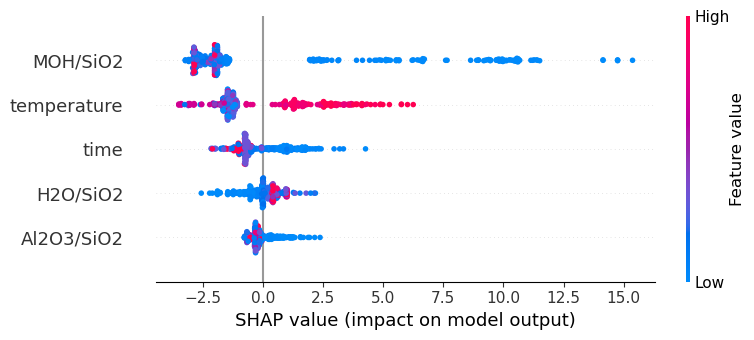

In [2]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="mor")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="mor")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="mor")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="mor")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="mor")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="mor")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# jbw

,importance
Al2O3/SiO2,146.067697
H2O/SiO2,119.575988
MOH/SiO2,193.382634
temperature,248.352463
time,34.346879


,false,jbw
false,394,0
jbw,0,17


,false,jbw
false,131,0
jbw,0,6


正解率(Accuracy) : 訓練 1.0, 検証 1.0
適合率(Precision) : 訓練 1.0, 検証 1.0
再現率(Recall) : 訓練 1.0, 検証 1.0
F1スコア : 訓練 1.0, 検証 1.0


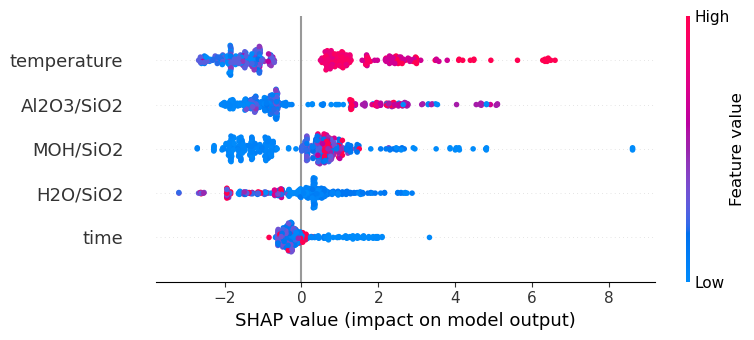

In [3]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 10]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="jbw")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="jbw")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="jbw")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="jbw")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="jbw")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="jbw")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# d6r

,importance
Al2O3/SiO2,612.841423
H2O/SiO2,415.347653
MOH/SiO2,790.296662
temperature,387.544997
time,282.185916


,d6r,false
d6r,135,1
false,2,273


,d6r,false
d6r,35,11
false,9,82


正解率(Accuracy) : 訓練 0.9927007299270073, 検証 0.8540145985401459
適合率(Precision) : 訓練 0.9854014598540146, 検証 0.7954545454545454
再現率(Recall) : 訓練 0.9926470588235294, 検証 0.7608695652173914
F1スコア : 訓練 0.989010989010989, 検証 0.7777777777777778


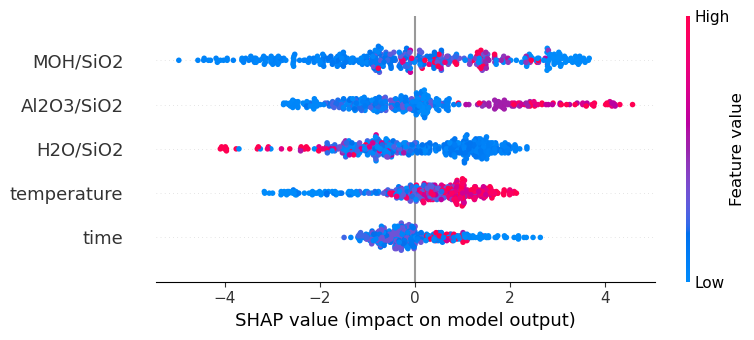

In [4]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d6r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d6r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d6r")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d6r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d6r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d6r")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# d8r

,importance
Al2O3/SiO2,435.538293
H2O/SiO2,189.623535
MOH/SiO2,426.073179
temperature,170.980631
time,275.816726


,d8r,false
d8r,46,0
false,0,365


,d8r,false
d8r,10,5
false,1,121


正解率(Accuracy) : 訓練 1.0, 検証 0.9562043795620438
適合率(Precision) : 訓練 1.0, 検証 0.9090909090909091
再現率(Recall) : 訓練 1.0, 検証 0.6666666666666666
F1スコア : 訓練 1.0, 検証 0.7692307692307693


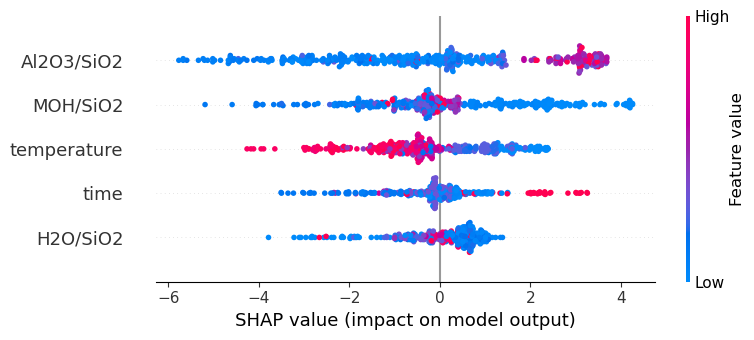

In [5]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 12]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d8r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d8r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d8r")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d8r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d8r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d8r")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# can

,importance
Al2O3/SiO2,356.882358
H2O/SiO2,427.840502
MOH/SiO2,535.481952
temperature,508.176197
time,246.292032


,can,false
can,82,1
false,0,328


,can,false
can,24,4
false,1,108


正解率(Accuracy) : 訓練 0.9975669099756691, 検証 0.9635036496350365
適合率(Precision) : 訓練 1.0, 検証 0.96
再現率(Recall) : 訓練 0.9879518072289156, 検証 0.8571428571428571
F1スコア : 訓練 0.9939393939393939, 検証 0.9056603773584906


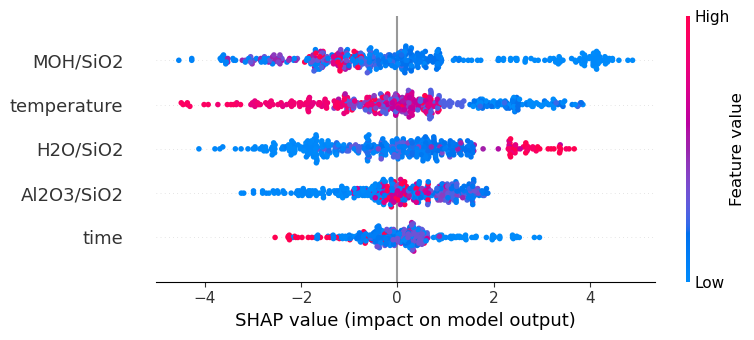

In [6]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 13]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="can")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="can")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="can")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="can")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="can")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="can")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# sod

,importance
Al2O3/SiO2,260.594664
H2O/SiO2,376.876697
MOH/SiO2,233.465438
temperature,1486.136133
time,166.545261


,false,sod
false,298,0
sod,0,113


,false,sod
false,96,3
sod,5,33


正解率(Accuracy) : 訓練 1.0, 検証 0.9416058394160584
適合率(Precision) : 訓練 1.0, 検証 0.9166666666666666
再現率(Recall) : 訓練 1.0, 検証 0.868421052631579
F1スコア : 訓練 1.0, 検証 0.8918918918918919


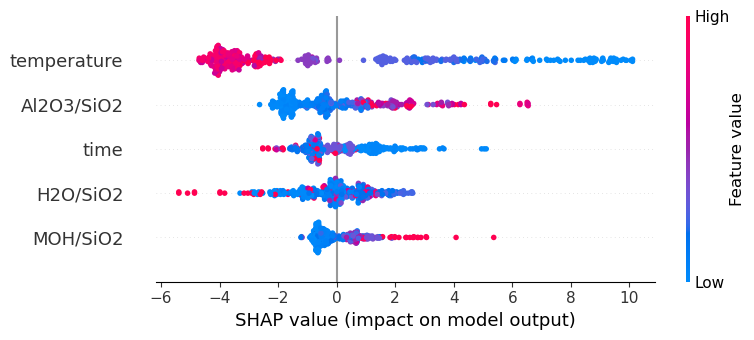

In [7]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 14]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="sod")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="sod")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="sod")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="sod")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="sod")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="sod")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# lta

,importance
Al2O3/SiO2,343.209631
H2O/SiO2,389.262715
MOH/SiO2,220.031420
temperature,699.080151
time,74.791162


,false,lta
false,351,0
lta,0,60


,false,lta
false,117,0
lta,5,15


正解率(Accuracy) : 訓練 1.0, 検証 0.9635036496350365
適合率(Precision) : 訓練 1.0, 検証 1.0
再現率(Recall) : 訓練 1.0, 検証 0.75
F1スコア : 訓練 1.0, 検証 0.8571428571428571


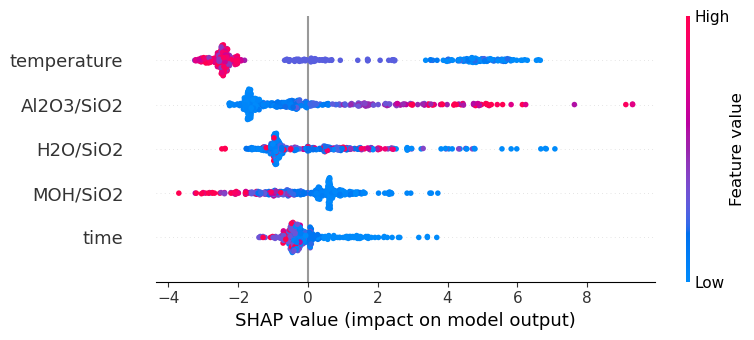

In [8]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 15]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="lta")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="lta")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="lta")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="lta")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="lta")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="lta")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 4

,importance
Al2O3/SiO2,455.556293
H2O/SiO2,440.618038
MOH/SiO2,1217.592600
temperature,352.594985
time,292.293797


,4,false
4,233,3
false,0,175


,4,false
4,75,4
false,8,50


正解率(Accuracy) : 訓練 0.9927007299270073, 検証 0.9124087591240876
適合率(Precision) : 訓練 1.0, 検証 0.9036144578313253
再現率(Recall) : 訓練 0.9872881355932204, 検証 0.9493670886075949
F1スコア : 訓練 0.9936034115138592, 検証 0.9259259259259259


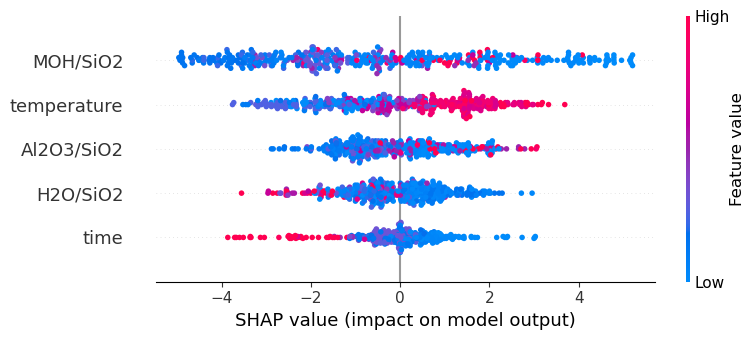

In [9]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 16]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 6

,importance
Al2O3/SiO2,362.234536
H2O/SiO2,520.257351
MOH/SiO2,1130.884127
temperature,294.934161
time,311.383869


,6,false
6,230,0
false,2,179


,6,false
6,69,7
false,12,49


正解率(Accuracy) : 訓練 0.9951338199513382, 検証 0.8613138686131386
適合率(Precision) : 訓練 0.9913793103448276, 検証 0.8518518518518519
再現率(Recall) : 訓練 1.0, 検証 0.9078947368421053
F1スコア : 訓練 0.9956709956709957, 検証 0.8789808917197452


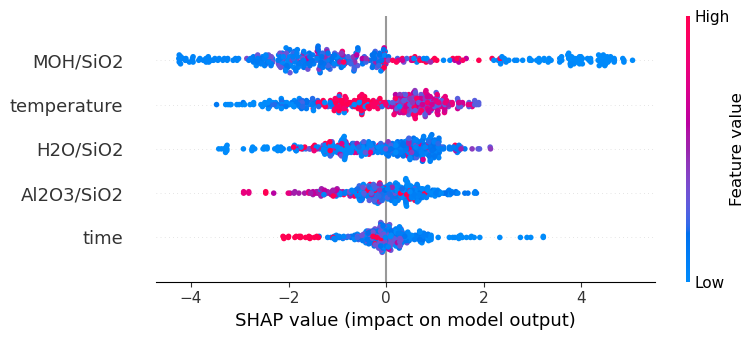

In [10]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 17]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 8

,importance
Al2O3/SiO2,743.419502
H2O/SiO2,392.311159
MOH/SiO2,539.911313
temperature,396.069180
time,395.313041


,8,false
8,130,1
false,0,280


,8,false
8,33,11
false,7,86


正解率(Accuracy) : 訓練 0.9975669099756691, 検証 0.8686131386861314
適合率(Precision) : 訓練 1.0, 検証 0.825
再現率(Recall) : 訓練 0.9923664122137404, 検証 0.75
F1スコア : 訓練 0.9961685823754789, 検証 0.7857142857142857


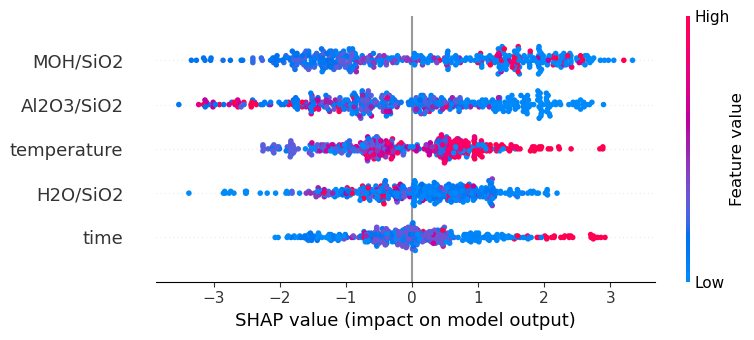

In [11]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 18]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="8")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="8")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="8")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="8")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="8")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="8")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 5-1

,importance
Al2O3/SiO2,98.411992
H2O/SiO2,101.338431
MOH/SiO2,1377.204304
temperature,156.339496
time,108.572364


,5-1,false
5-1,63,0
false,0,348


,5-1,false
5-1,21,0
false,1,115


正解率(Accuracy) : 訓練 1.0, 検証 0.9927007299270073
適合率(Precision) : 訓練 1.0, 検証 0.9545454545454546
再現率(Recall) : 訓練 1.0, 検証 1.0
F1スコア : 訓練 1.0, 検証 0.9767441860465116


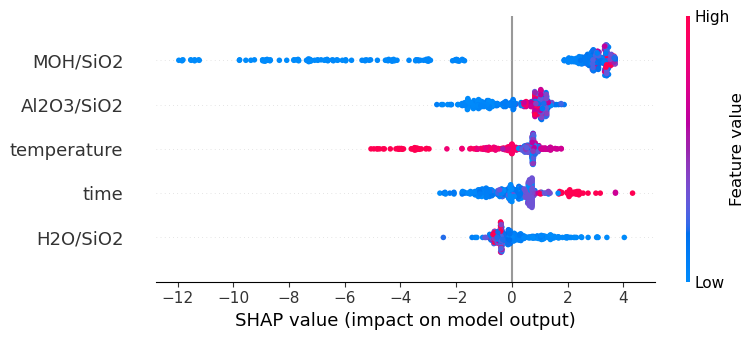

In [12]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 19]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="5-1")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="5-1")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="5-1")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="5-1")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="5-1")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="5-1")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 4-2

,importance
Al2O3/SiO2,612.841423
H2O/SiO2,415.347653
MOH/SiO2,790.296662
temperature,387.544997
time,282.185916


,4-2,false
4-2,135,1
false,2,273


,4-2,false
4-2,35,11
false,9,82


正解率(Accuracy) : 訓練 0.9927007299270073, 検証 0.8540145985401459
適合率(Precision) : 訓練 0.9854014598540146, 検証 0.7954545454545454
再現率(Recall) : 訓練 0.9926470588235294, 検証 0.7608695652173914
F1スコア : 訓練 0.989010989010989, 検証 0.7777777777777778


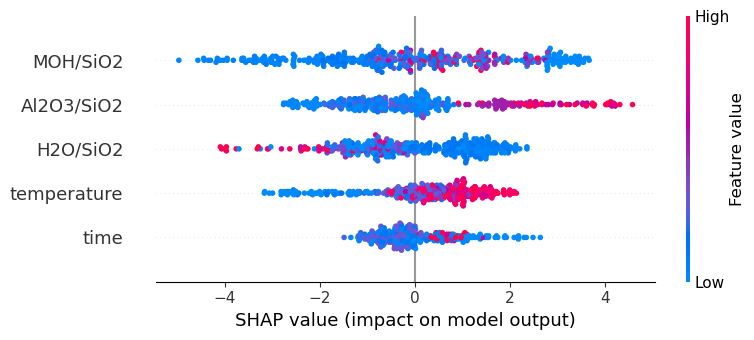

In [14]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 20]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4-2")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4-2")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# 6-2

,importance
Al2O3/SiO2,618.476635
H2O/SiO2,345.730792
MOH/SiO2,642.021626
temperature,440.964215
time,255.442221


,6-2,false
6-2,115,0
false,1,295


,6-2,false
6-2,32,7
false,9,89


正解率(Accuracy) : 訓練 0.9975669099756691, 検証 0.8832116788321168
適合率(Precision) : 訓練 0.9913793103448276, 検証 0.7804878048780488
再現率(Recall) : 訓練 1.0, 検証 0.8205128205128205
F1スコア : 訓練 0.9956709956709957, 検証 0.8


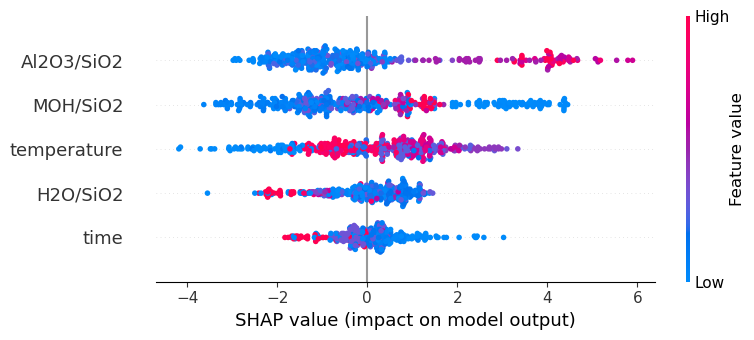

In [15]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:2], dataset.iloc[:, 5:8]], axis=1)
y=dataset.iloc[:, 21]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6-2")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6-2")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK